<a href="https://colab.research.google.com/github/darvesh-sd/Copy-of-TPSessions.ipynb/blob/main/TP2_Web_Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Starting book scraping process...
Currently scraping: https://books.toscrape.com/catalogue/page-1.html
Extracted 20 books from page 1.
Currently scraping: https://books.toscrape.com/catalogue/page-2.html
Extracted 20 books from page 2.
Currently scraping: https://books.toscrape.com/catalogue/page-3.html
Extracted 20 books from page 3.
Currently scraping: https://books.toscrape.com/catalogue/page-4.html
Extracted 20 books from page 4.
Currently scraping: https://books.toscrape.com/catalogue/page-5.html
Extracted 20 books from page 5.

Scraping completed! Total books scraped: 100.
Visualizing image types...


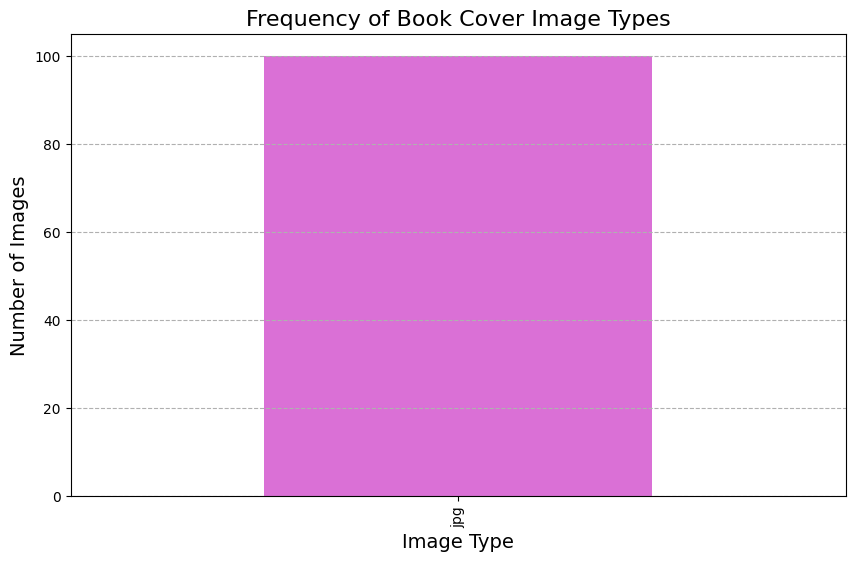

Data successfully saved as 'scraped_books.csv'. Here’s a quick preview:


,Book Title,Cover Image URL,Image Type
0,A Light in the Attic,https://books.toscrape.com/media/cache/2c/da/2...,jpg
1,Tipping the Velvet,https://books.toscrape.com/media/cache/26/0c/2...,jpg
2,Soumission,https://books.toscrape.com/media/cache/3e/ef/3...,jpg
3,Sharp Objects,https://books.toscrape.com/media/cache/32/51/3...,jpg
4,Sapiens: A Brief History of Humankind,https://books.toscrape.com/media/cache/be/a5/b...,jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


 Superb! You successfully completed scraping.
Try exploring your DataFrame with these suggestions:
- df_books.head(): See initial entries.
- df_books['Book Title'].unique(): Check for unique book titles.
- df_books.groupby('Image Type').size(): Count by image type.


In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

"""
Interactive Book Scraper - Google Colab Version
-----------------------------------------------

This Python script extracts book titles and their cover images from "Books to Scrape" using a user-friendly, fully-explained approach tailored specifically for Google Colab. It's designed to enhance your web scraping skills practically and interactively.

Author: Darvesh
Date: May 14, 2025
"""

# Step 1: Install required libraries
!pip install requests beautifulsoup4 pandas matplotlib

# Import essential libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import random
import time
from urllib.parse import urljoin
from google.colab import files

# Defining key variables
BASE_URL = "https://books.toscrape.com/catalogue/"
TOTAL_PAGES = 5

# HTTP headers for realistic browsing
HEADERS = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36'
                  ' (KHTML, like Gecko) Chrome/93.0.4577.82 Safari/537.36'
}

# URL construction function
def create_page_url(page_number):
    """Generates the full URL for each page."""
    return f"{BASE_URL}page-{page_number}.html"

# Extracting image extensions
def find_image_extension(image_link):
    """Extract the file extension from the image URL."""
    return image_link.split('.')[-1]

# Scraping function per page
def scrape_page_content(url):
    """Extracts book titles and images from the provided URL."""
    print(f"Currently scraping: {url}")
    extracted_books = []

    # Introducing a pause to mimic natural browsing
    time.sleep(random.uniform(1, 2))

    try:
        response = requests.get(url, headers=HEADERS)
        response.raise_for_status()
        soup = BeautifulSoup(response.content, 'html.parser')

        book_elements = soup.select('article.product_pod')
        for book in book_elements:
            book_title = book.h3.a['title']
            image_relative_link = book.find('img')['src']
            image_full_link = urljoin('https://books.toscrape.com/', image_relative_link)
            image_extension = find_image_extension(image_full_link)

            extracted_books.append({
                'Book Title': book_title,
                'Cover Image URL': image_full_link,
                'Image Type': image_extension
            })

    except requests.RequestException as err:
        print(f"Error scraping {url}: {err}")

    return extracted_books

# Visualizing the collected data
def display_image_types(df):
    """Creates a bar chart showing frequency of image types."""
    print("Visualizing image types...")
    df['Image Type'].value_counts().plot(kind='bar', figsize=(10, 6), color='orchid')
    plt.title('Frequency of Book Cover Image Types', fontsize=16)
    plt.xlabel('Image Type', fontsize=14)
    plt.ylabel('Number of Images', fontsize=14)
    plt.grid(axis='y', linestyle='--')
    plt.show()

# Data saving and downloading function
def save_scraped_data(df, filename='scraped_books.csv'):
    """Saves data to CSV and triggers download."""
    df.to_csv(filename, index=False)
    print(f"Data successfully saved as '{filename}'. Here’s a quick preview:")
    display(df.head())
    files.download(filename)

# Main scraping execution
print("Starting book scraping process...")
books_data = []

for page in range(1, TOTAL_PAGES + 1):
    current_url = create_page_url(page)
    page_data = scrape_page_content(current_url)
    print(f"Extracted {len(page_data)} books from page {page}.")
    books_data.extend(page_data)

print(f"\nScraping completed! Total books scraped: {len(books_data)}.")

# Creating DataFrame for analysis
df_books = pd.DataFrame(books_data)

# Visualizing the scraped data
display_image_types(df_books)

# Saving results
save_scraped_data(df_books)

# Helpful follow-up instructions
print("\n Superb! You successfully completed scraping.")
print("Try exploring your DataFrame with these suggestions:")
print("- df_books.head(): See initial entries.")
print("- df_books['Book Title'].unique(): Check for unique book titles.")
print("- df_books.groupby('Image Type').size(): Count by image type.")